# 1.

#### The standard deviation of a sample is a measure of how much each individual datapoint varies from the mean (i.e the higher the standard deviation, the more spread out the values are). 
#### The standard error of the mean, on the other hand, is how much the sample mean for a give data sample varies from the population mean (the mean of a hypothetical dataset where every possible data point would be sampled). The lower the standard error of the mean, the more representative the sample is of the overall population. 

##### Relation to boostrapping: Since bootstrapping is an attempt to capture trends in the entire population based of one sampled dataset via random resampling, the distributions of the mean from all bootstrapped samples allows one to calculate the standard error of the mean simply from the standard deviation of the mean distribution (i.e. how much the mean varies from the 'mean mean' (the population mean)).

# 2.

#### The Standard error of the mean can be used to create a confidence interval which covers 95 percent of the bootstrapped sample means in the following manner:
Confidence Interval = (sample mean) ± (critical value (for 95% CI of sample means that follow normal distribution, critical value= approx 2)) * (standard error of the mean)

# 3.

#### The 95% confidence interval of the bootstrapped sample means can be calculated by taking the lower bound of the confidence interval as the 2.5th percentile (when the means are sorted) and the upper bound as the 97.5 percentile. This captures the most frequent 95 percent of the data (as the interval is centered around the mean) and thus we can say with 95% confidence that the population mean falls within this range.

# 4.

##### directions for computing the confidence interval with regard to the sample median (as opposed to the sample mean) are in the comments

Original Sample Mean: 97.18
95% Bootstrap Confidence Interval: [92.44, 101.95]


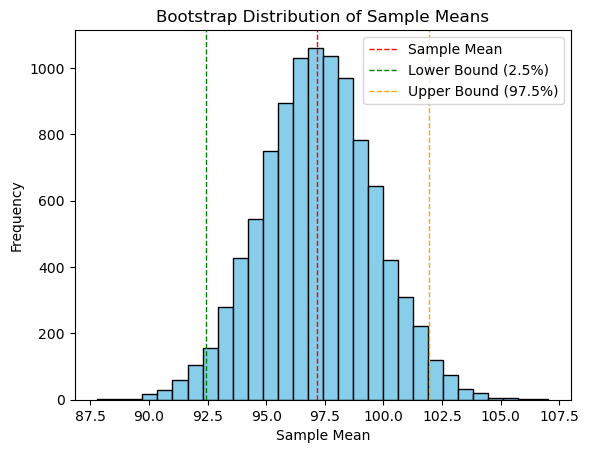

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random sample of data (e.g., normally distributed)
sample_size = 30  # Size of the original sample
sample_data = np.random.normal(loc=100, scale=15, size=sample_size)

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Function to perform bootstrap resampling
def bootstrap_sample_mean(data, n_samples):
    means = []
    for _ in range(n_samples):
        # Resample with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(bootstrap_sample))# CHANGE TO ...(np.median(bootstrap_sample))
    return np.array(means)

# Generate bootstrap samples
bootstrap_means = bootstrap_sample_mean(sample_data, n_bootstrap_samples)

# Calculate the 2.5th and 97.5th percentiles for the confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Calculate the original sample mean
original_mean = np.mean(sample_data)# CHANGE TO ...np.median(sample_data)

# Output results
print(f"Original Sample Mean: {original_mean:.2f}")
print(f"95% Bootstrap Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Plotting the bootstrap distribution of the means
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(original_mean, color='red', linestyle='dashed', linewidth=1, label='Sample Mean')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label='Lower Bound (2.5%)')
plt.axvline(upper_bound, color='orange', linestyle='dashed', linewidth=1, label='Upper Bound (97.5%)')
plt.title('Bootstrap Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Original Sample Median: 96.49
95% Bootstrap Confidence Interval: [92.40, 102.65]


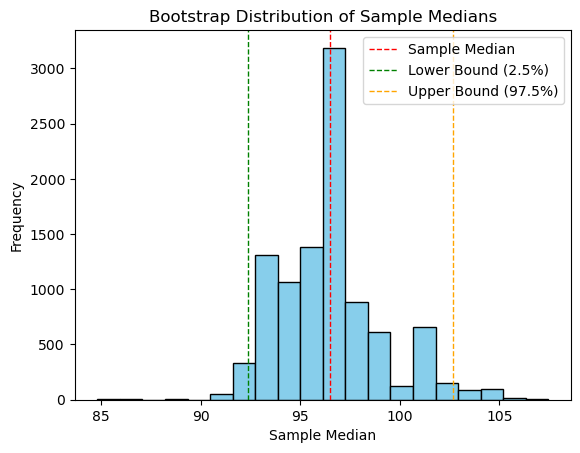

In [2]:
### With Changes applied

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random sample of data (e.g., normally distributed)
sample_size = 30  # Size of the original sample
sample_data = np.random.normal(loc=100, scale=15, size=sample_size)

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Function to perform bootstrap resampling
def bootstrap_sample_median(data, n_samples):
    medians = []
    for _ in range(n_samples):
        # Resample with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(bootstrap_sample))# CHANGE TO ...(np.median(bootstrap_sample))
    return np.array(medians)

# Generate bootstrap samples
bootstrap_medians = bootstrap_sample_median(sample_data, n_bootstrap_samples)

# Calculate the 2.5th and 97.5th percentiles for the confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Calculate the original sample mean
original_median = np.median(sample_data)# CHANGE TO ...np.median(sample_data)

# Output results
print(f"Original Sample Median: {original_median:.2f}")
print(f"95% Bootstrap Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Plotting the bootstrap distribution of the means
plt.hist(bootstrap_medians, bins=20, color='skyblue', edgecolor='black') ## BIN SIZE ADJUSTED
plt.axvline(original_median, color='red', linestyle='dashed', linewidth=1, label='Sample Median')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=1, label='Lower Bound (2.5%)')
plt.axvline(upper_bound, color='orange', linestyle='dashed', linewidth=1, label='Upper Bound (97.5%)')
plt.title('Bootstrap Distribution of Sample Medians')
plt.xlabel('Sample Median')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 5.

#### In the context of means, (although this is equally applicable to any other of the dataset parameters), the population parameter (aka the true mean or the mean across a dataset that is perfectly representative of the population) represents a fixed value that never changes, while the sample statistic is a mere estimate of that same parameter which can vary based on sample selection (the goal of bootstrapping is to decrease this variability). The very point of a confidence interval is to compute the range of plausible values of the true mean based of the sample mean and therefore reflects the uncertainty of the sample data's representation of the population. Thus a confidence interval of 50% would be more narrow than a confidence interval of 95%, but the latter would be a more 'confident' or plausible assesment of the likely range in which the population parameter lies than the former, albeit less precise.

# 6.

1. What is the process of bootstrapping?

One takes a sample of data he/she has accumulated (8 marbles each with a number between 1-10 representing how dark they are), and then takes subsamples of that data randomly which are of the same size as the original data but may contain duplicates and thus do not neccessarily contain every piece of data from the original dataset (i.e. put the marbles in a bag and pick one randomly 8 times, putting the marble back in the bag after each iteration). This process is repeated many times, and on each subsample is computed the desired parameter one wishes to ascertain (such as the average value of a particualr feature of your data (in this case the average darkness of a marble)).

2. What is the main purpose of bootstrapping?

Computing that desired parameter on a bunch of bootstrapped samples instead of on the original sample alone allows one to find general trends in the data that reveal the degree to which it represents the population data (i.e. the ideal dataset had every possible datapoint (in this case marble) been gathered. The very point of statistics is to try to garner information from samples that reveal information about the broader population from which that data has been sampled).

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Follwing the bootstrapping process and attaining a set of means (an average darkness from each random sampling of marbles) for all the bootstrapped samples, one would compute a confidence interval (i.e. a range of mean that with a certain degree of certainty are plausible representatives of the population mean) and then see if the sample mean falls within this distribution (i.e. check if the average darkness for the sample of 8 marbles falls within the range of plausible average darkness of all marbles that could possibly be sampled). 


# 7.

#### A confidence interval that covers zero fails to reject the null hypothesis because this scenario indicates that at the desired confidence level reflected in the interval, there can easily exist a population which contains our sampled statistic as a subsample and yet whose aformentioned parameter which would return zero in the event of a null hypothesis does indeed return zero when computed over the entire hypthetical population distribution. Thus our sample does not provide strong enough evidence to exclude the null hypothesis as a possible inference. To reject the null hypothesis at a given confidence level, the confidence interval for our subsample must be such that it does not include zero. We would then be able to infer that the true population parameter is not zero and thus rejects the null hypothesis.

# 8.

### NOTE: The following is a massive oversimplification. We prove only that on average (across all demographics included in the dataset), there is an improvement in health following the patient's use of the new drug.

#### We load the data and attempt to simplify it:

In [3]:
import pandas as pd
from io import StringIO

data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

csv_data = StringIO(data)
df = pd.read_csv(csv_data)



In [4]:
df.head()

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84


In [9]:
df.shape

(10, 6)

#### We create a new parameter containing the difference in final and initial health score after the drug is administered

In [21]:
df["HealthScoreDifference"] = df["FinalHealthScore"] - df["InitialHealthScore"]
df["HealthScoreDifference"].describe()

count    10.000000
mean      3.300000
std       4.029061
min      -3.000000
25%       1.250000
50%       4.000000
75%       6.750000
max       8.000000
Name: HealthScoreDifference, dtype: float64

#### We check the general effect of the drug on the improvement/degeneration of the patient's health by plotting a kernel density estimator. We see that the average improvement was positive at 3.3 after administering of the drug, but that there exists samples that had a much greater improvement or even a worsening of condition.

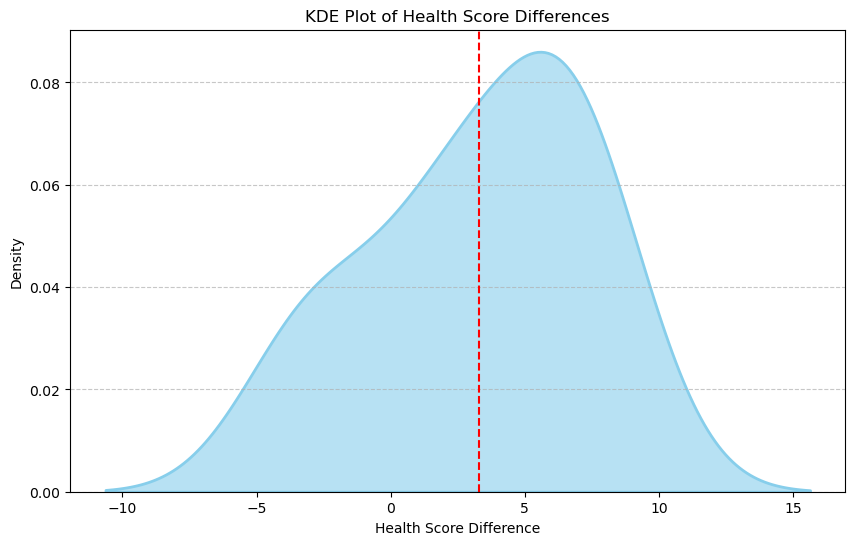

Mean Difference: 3.30


In [17]:
import seaborn as sns

mean_difference = df['HealthScoreDifference'].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['HealthScoreDifference'], fill=True, color='skyblue', alpha=0.6, linewidth=2)

plt.axvline(mean_difference, color='red', linestyle='--', label=f'Mean: {mean_difference:.2f}')
plt.title('KDE Plot of Health Score Differences')
plt.xlabel('Health Score Difference')
plt.ylabel('Density')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid for better readability
plt.show()
print(f"Mean Difference: {mean_difference:.2f}")

#### We now check if the subsample is representative of the population to a high enough degree such that we can reject the null hypothesis (i.e. the drug has no effect on the health of a patient). Note that this is a oversimplification and different trends might be visible had we taken into account factors such as age, initial health level, etc.

#### We proceed with bootstrapping and compute the 95% confidence interval with respect to the population distribution:

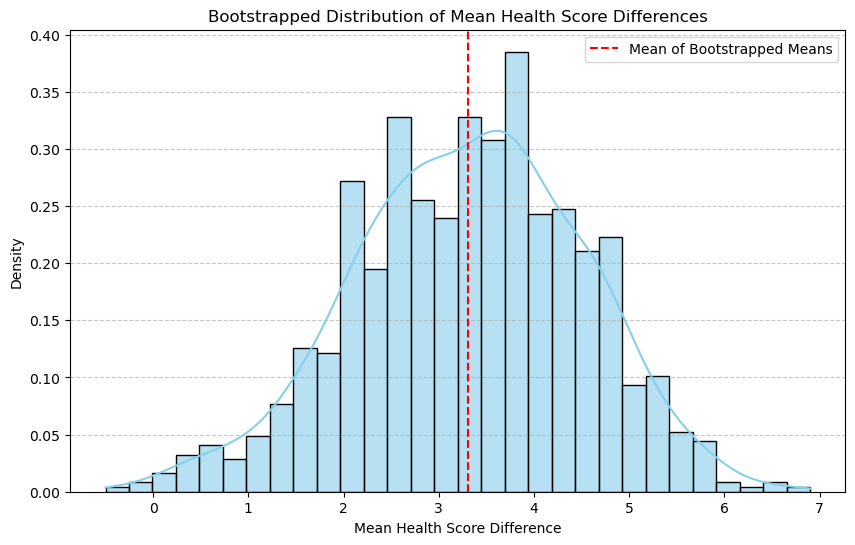

In [18]:
n_bootstraps = 1000
bootstrapped_means = []

# Bootstrapping process
for _ in range(n_bootstraps):
    # Generate a bootstrap sample
    sample = df['HealthScoreDifference'].sample(n=len(df), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrapped_means.append(sample.mean())

# Plotting the distribution of bootstrapped means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_means, bins=30, kde=True, color='skyblue', stat='density', edgecolor='black', alpha=0.6)

# Adding labels and title
plt.title('Bootstrapped Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Density')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid for better readability
plt.axvline(np.mean(bootstrapped_means), color='red', linestyle='--', label='Mean of Bootstrapped Means')
plt.legend()
plt.show()

#### And as a KDE:

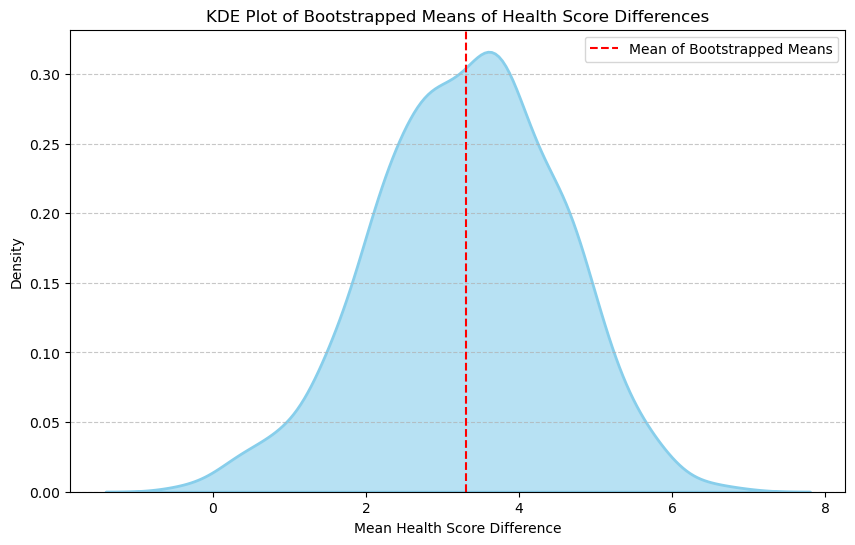

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(bootstrapped_means, fill=True, color='skyblue', alpha=0.6, linewidth=2)

# Adding labels and title
plt.title('KDE Plot of Bootstrapped Means of Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Density')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid for better readability
plt.axvline(np.mean(bootstrapped_means), color='red', linestyle='--', label='Mean of Bootstrapped Means')
plt.legend()
plt.show()

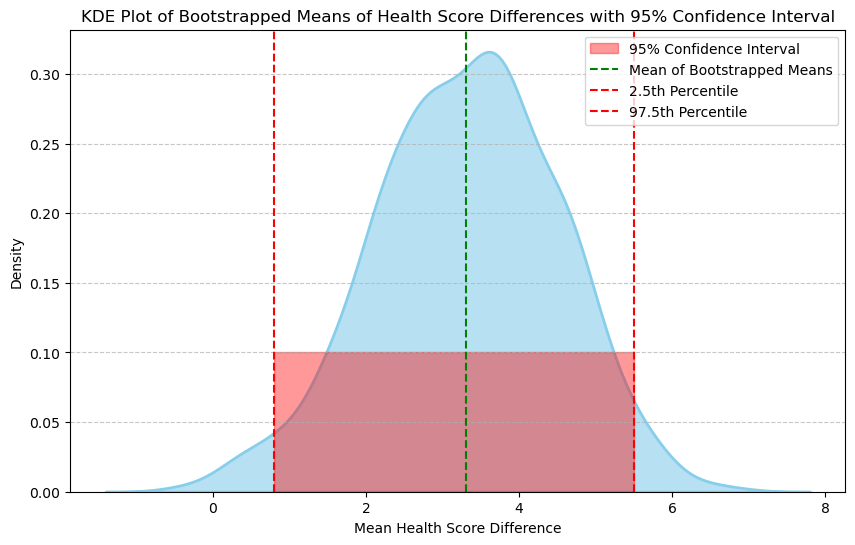

In [20]:
ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

# Plotting the KDE of bootstrapped means
plt.figure(figsize=(10, 6))
sns.kdeplot(bootstrapped_means, fill=True, color='skyblue', alpha=0.6, linewidth=2)

# Adding a shaded area for the confidence interval
plt.fill_betweenx(y=[0, 0.1], x1=ci_lower, x2=ci_upper, color='red', alpha=0.4, label='95% Confidence Interval')

# Adding labels and title
plt.title('KDE Plot of Bootstrapped Means of Health Score Differences with 95% Confidence Interval')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Density')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid for better readability
plt.axvline(np.mean(bootstrapped_means), color='green', linestyle='--', label='Mean of Bootstrapped Means')
plt.axvline(ci_lower, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(ci_upper, color='red', linestyle='--', label='97.5th Percentile')
plt.legend()
plt.show()

#### Since the 95% confidence interval does not include 0, we can reject with 95% certainty the null hypothesis, or that the drug results on average in no improvment in the general population.

# 9.

#### YES

# Chat Log and documentation

### Summary Log of Conversation

**Participants**: User (You), AI (ChatGPT)

**Date**: [Insert Date]

---

**Topics Discussed:**

1. **Confidence Intervals**:
   - You asked for a clear definition, and I explained that a confidence interval is a range of values likely to contain the true population parameter with a certain level of confidence.
   - We discussed the significance of distinguishing between population parameters and sample statistics in confidence intervals. I clarified that while sample statistics estimate population parameters, the confidence interval provides a range for where we believe the true parameter lies based on our sample.

2. **Bootstrapping**:
   - You inquired about the bootstrapping process, and I outlined that it involves taking repeated samples from a dataset, allowing duplicates, to compute statistics like means for analysis.
   - We explored how bootstrapping can assess the plausibility of a hypothesized population mean by comparing it to bootstrapped sample means and calculating a confidence interval.

3. **Statistical Concepts**:
   - You asked about the difference between standard error of the mean and standard deviation. I explained that standard deviation measures data spread, while the standard error quantifies how much the sample mean is expected to vary from the true population mean.
   - We discussed normal distribution and its prevalence in data, as well as hypothesis testing, particularly how a confidence interval covering zero leads to failing to reject the null hypothesis.

4. **Practical Applications**:
   - You requested help to create a Pandas DataFrame from CSV data representing patient health scores. I provided code to read the data and compute the difference between final and initial health scores.
   - We plotted various visualizations, including:
     - Health score differences on a number line.
     - Histograms of health score differences based on age.
     - KDE plots of health score differences, including a vertical line showing the mean.
  
5. **Bootstrapping Implementation**:
   - You asked for code to create a distribution of mean health score differences using bootstrapping. I provided the necessary code and explained each step.
   - Finally, we discussed how to plot a KDE for the bootstrapped means and include a shaded area for the 95% confidence interval. I provided code to visualize this with annotations for clarity.

---

**Conclusion**:
- The conversation covered key statistical concepts related to confidence intervals, bootstrapping, and visual data analysis using Pandas and Seaborn.
- You engaged actively with detailed questions and requested specific code implementations, demonstrating a strong interest in applying statistical concepts practically.


https://chatgpt.com/share/66f9977b-526c-8005-a5bc-0e620dca50a1